# Introduction

My final project datasets include the "classics" dataset from corgis, and various books written by Jane Austen from Project Gutenberg. As a fan of classic literature, I am motivated to conduct analysis about Jane Austen because she was one of the greatest female novelists in the 18th century. Her works always express a well-articulated crique and reflection about romance, marriage, wealth, and society, which led me to ask the question: what is the unique writing style or characteristic of Jane Austen? To answer this question, I will be using data from the following sources:
https://corgis-edu.github.io/corgis/csv/classics/
https://www.gutenberg.org/ebooks/31100

# Methods

The classics dataset includes data about 1006 books from the work of 555 authors. For each book, the dataset provides general information such as publication year and classification, also word analysis information such as number of sentences or reading difficulty level scores.

Potential areas of concern in the data are overlapping information and missing/misleading publication years. The book 'Pride and Prejudice,' for example, has two versions, with one being an updated version and the other being an older version. Publication year may also be misleading as the year may reflect a more recent, edited publication of the book rather than the original publication year.

In [1]:
# importing the data
import pandas as pd

dataset = "classics.csv"

classic_data = pd.read_csv('classics.csv')
classic_data.head()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27,0.04,100372,397,800,28752.3,22022


In [2]:
# basic statistics
num_books = classic_data['bibliography.title'].count()
print(num_books)

1006


In [3]:
num_authors = classic_data['bibliography.author.name'].nunique()
print(num_authors)

555


To clean the data, I use the Pandas python library to remove duplicate rows with same boook title, then keeping the updated version of the book. Since my research question is about the works of Jane Austen, I will be filtering out the data to include only Jane Austen's books and create a separate new dataframe. 

In [4]:
# remove duplicate columns
columns_to_check_duplicates = ['bibliography.title']
new_classic = classic_data.drop_duplicates(subset=columns_to_check_duplicates, keep='last')
new_classic.head()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15,0.06,26769,102,385,7686.9,6067
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27,0.04,100372,397,800,28752.3,22022
5,PS,en,Male friendship -- Fiction;Humorous stories;Mi...,Adventures of Huckleberry Finn,Text,15347,76,6,https://www.gutenberg.org/ebooks/76,1835,...,0.089319,0.474519,4.36,19,0.05,485099,1180,5792,132642.9,111219
6,PR,en,"Identity (Psychology) -- Drama,Comedies,Englan...",The Importance of Being Earnest: A Trivial Com...,Text,13638,844,7,https://www.gutenberg.org/ebooks/844,1854,...,0.100270,0.534784,4.94,10,0.10,101906,555,1994,29187.0,20625
7,"PZ,PS",en,Male friendship -- Fiction;Humorous stories;Mi...,The Adventures of Tom Sawyer,Text,13237,74,8,https://www.gutenberg.org/ebooks/74,1835,...,0.064761,0.487048,4.78,15,0.06,338075,1488,4594,92593.8,70796


In [5]:
# subset data with only Jane Austen's work
jane_data = new_classic[new_classic['bibliography.author.name'] == "Austen, Jane"]
jane_data

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
22,PR,en,"Fathers and daughters -- Fiction,Humorous stor...",Emma,Text,8513,158,23,https://www.gutenberg.org/ebooks/158,1775,...,0.157109,0.542307,4.80,16,0.06,755056,4851,9348,216434.7,157439
88,PR,en,"Ship captains -- Fiction,First loves -- Fictio...",Persuasion,Text,3079,105,89,https://www.gutenberg.org/ebooks/105,1775,...,0.148467,0.522353,4.76,23,0.04,396720,2450,3535,114975.0,83284
100,PR,en,"Gentry -- England -- Fiction,Horror tales -- A...",Northanger Abbey,Text,2871,121,101,https://www.gutenberg.org/ebooks/121,1775,...,0.132992,0.532460,4.81,21,0.05,370744,2548,3651,108090.0,77140
114,PR,en,"Country homes -- Fiction,Adoptees -- Fiction,C...",Mansfield Park,Text,2537,141,115,https://www.gutenberg.org/ebooks/141,1775,...,0.143009,0.526260,4.72,21,0.05,752380,4733,7336,217970.1,159540
394,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,912,42671,395,https://www.gutenberg.org/ebooks/42671,1775,...,0.136093,0.522054,4.84,18,0.05,590445,4548,6563,171244.8,121919
590,PR,en,"Epistolary fiction,Essays,England -- Social li...",Love and Freindship [sic],Text,654,1212,591,https://www.gutenberg.org/ebooks/1212,1775,...,0.142070,0.547007,4.75,26,0.04,157906,1091,1263,47058.3,33252
602,PR,en,"Gentry -- England -- Fiction,Sisters -- Fictio...",Sense and Sensibility,Text,645,21839,603,https://www.gutenberg.org/ebooks/21839,1775,...,0.131733,0.532080,4.85,21,0.05,591337,4047,5566,171572.4,121839
630,PR,en,"Widows -- Fiction,England -- Fiction,Mate sele...",Lady Susan,Text,621,946,631,https://www.gutenberg.org/ebooks/946,1775,...,0.127080,0.553882,4.72,23,0.04,108750,899,993,32407.2,23047
784,PR,en,England -- Social life and customs -- Fiction;...,The Complete Project Gutenberg Works of Jane A...,Text,514,31100,785,https://www.gutenberg.org/ebooks/31100,1775,...,0.142298,0.531765,4.79,20,0.05,3720159,25224,38194,1079247.6,777121


Next, I will be moving on to exploratory data analysis. My process is to create visualizations using both the classics data and jane_austen data to discover the relative status of Jane's work in comparison to other classic literature authors. Then I will create visualizations using only the jane_austen data to obtain some basic statistics that show comparision within her complete set of writings.

After exploratory data analysis, I will move on to creating data visualizations that directly answer my research question. I plan to conduct four types of data visualizations: overall sentiment, sentiment development, character analysis, and important sentences. Upon completing visualizations, I will research secondary sources about Jane Austen's lifestory and scholarly interpretations of her work, then incorporate my findings into the discussion section. 

# Results

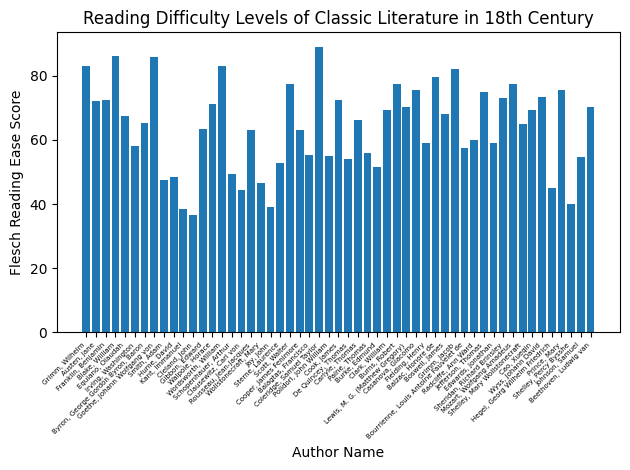

In [6]:
# Data Exploration 1
import matplotlib.pyplot as plt

author_birth_year = new_classic['bibliography.author.birth']
filtered_data = new_classic[author_birth_year.between(1700, 1799)]
author_name = filtered_data['bibliography.author.name']
readability_score = filtered_data['metrics.difficulty.flesch reading ease']

plt.bar(author_name, readability_score)
plt.xlabel("Author Name")
plt.ylabel("Flesch Reading Ease Score")
plt.title("Reading Difficulty Levels of Classic Literature in 18th Century")
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.tight_layout()

plt.show()

This bar plot shows that Jane Austen's work has an average flesch reading score of about 70, which is a fairly easy reading level (7th grade material according to official flesch reading ease website) in comparison to other authors in the same time period. An easy to read level may suggest that Jane intends for her writing to be popularly circulated, so she writes in an easier, less difficult language to attract a public audience. 

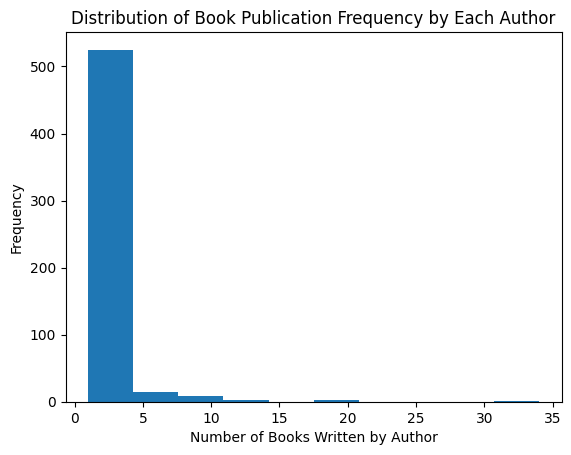

In [7]:
# Data Exploration 2

author_book_count = new_classic.groupby('bibliography.author.name')['bibliography.title'].count()

plt.hist(author_book_count)
plt.xlabel('Number of Books Written by Author')
plt.ylabel('Frequency')
plt.title('Distribution of Book Publication Frequency by Each Author')
plt.show()

This histogram show the number of books written per author. The most frequent number of books written per lifetime of a classic literature author is between 0 to 5. Jane Austen had 8 publications, which is substantially more compared to other classics authors. What are potential contributing factors for this? Her career as a novelist, talent, family background, time period could all be contriubting factors. These external factors also contributes to the writing style that Jane Austen would adopt.

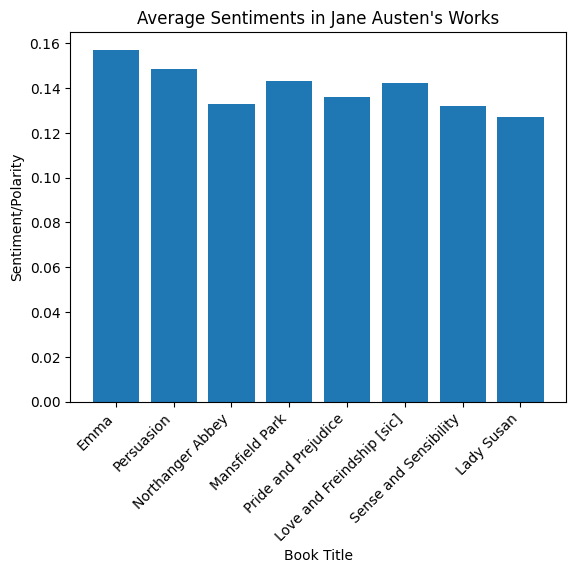

In [8]:
# Data Exploration 3

book_title = jane_data['bibliography.title']
title_to_exclude = 'The Complete Project Gutenberg Works of Jane Austen: A Linked Index of all PG Editions of Jane Austen'
filtered_book_title = book_title[~(book_title == title_to_exclude)]
sentiment = jane_data['metrics.sentiments.polarity']
filtered_sentiment = jane_data.loc[~(book_title == title_to_exclude), 'metrics.sentiments.polarity']

plt.bar(filtered_book_title, filtered_sentiment)
plt.title("Average Sentiments in Jane Austen's Works")
plt.xlabel("Book Title")
plt.ylabel("Sentiment/Polarity")
plt.xticks(rotation=45, ha='right')
plt.show()

This bar plot shows that the average sentiment/polarity score of Jane Austen's works range from 0.12 to 0.16. This is an overall positive score, which means that Jane Austen generally adopt a positive tone in her writings. This finding would be further explored in the next section through the analysis of sentiment development in each book.

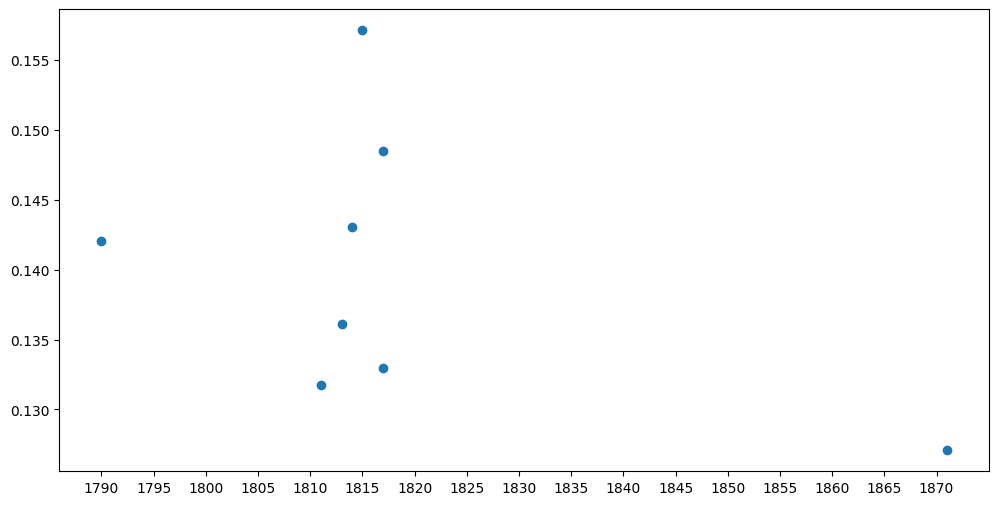

In [9]:
# Data Exploration 4

title_to_exclude = 'The Complete Project Gutenberg Works of Jane Austen: A Linked Index of all PG Editions of Jane Austen'
sentiment = jane_data['metrics.sentiments.polarity']
filtered_sentiment = jane_data.loc[~(book_title == title_to_exclude), 'metrics.sentiments.polarity']
pub_year = [1815, 1817, 1817, 1814, 1813, 1790, 1811, 1871]

plt.figure(figsize=(12, 6))
plt.xticks(range(min(pub_year), max(pub_year)+1, 5))
plt.scatter(pub_year, filtered_sentiment)
plt.show()

This scatterplot shows the sentiment score of Austen's works ordered by publication year (since the original data had misleading publication years, I created a new list of first publication years based on my research from the Internet). We can see a sentiment score increase as Jane publishes more books, but then the sentiment score decreases in her most recent work. We can also see that there is a gap in the graph, for which Jane's peak years were 1810s to 1820s, then she did not publish anything until 50 years later in the 1870s. Jane's personal lifetime could have contributed to her fluctuating choice of words in her works, which will be further explore in the analysis section.

For my analysis, I plan to webscrape the Project Gutenberg's complete collection of works by Jane Austen. I would use the requests package to retrieve each books' text file from the website, then split each text into string according to chapters. The end result would be 8 strings with eacch string item being one chapter of that particular book.

In [10]:
# Create a function to webscrape text files from Project Gutenberg
import requests
from bs4 import BeautifulSoup

def scrape_txt(target_url):
    response = requests.get(target_url)
    parse = BeautifulSoup(response.content, 'html.parser')

    download_link = None
    for link in parse.find_all('a'):
        if 'Plain Text UTF-8' in link.get_text():
            download_link = link['href']
            break

    if download_link:
        txt_url = f"https://www.gutenberg.org/{download_link}"
        response = requests.get(txt_url)
        txt_content = response.text
        return txt_content
    else:
        return None

In [11]:
# Create a string of all Jane Austen's work, each item is one book
jane_austen = []

for url in jane_data['metadata.url']:
    content = scrape_txt(url)
    if content is not None:
        jane_austen.append(content)

book_title = jane_data['bibliography.title']
jane_austen_work = dict(zip(book_title, jane_austen))
jane_austen_work = dict(list(jane_austen_work.items())[:8])

In [12]:
print(jane_data['metadata.url'])

22       https://www.gutenberg.org/ebooks/158
88       https://www.gutenberg.org/ebooks/105
100      https://www.gutenberg.org/ebooks/121
114      https://www.gutenberg.org/ebooks/141
394    https://www.gutenberg.org/ebooks/42671
590     https://www.gutenberg.org/ebooks/1212
602    https://www.gutenberg.org/ebooks/21839
630      https://www.gutenberg.org/ebooks/946
784    https://www.gutenberg.org/ebooks/31100
Name: metadata.url, dtype: object


In [13]:
# splitting each book into chapters, all accessible in the dictionary "chapters"
import re

chapters = {}
titles = {
    'Emma': 'EMMA',
    'Persuasion': 'PERSUASION',
    'Northanger Abbey': 'NORTHANGER ABBEY',
    'Mansfield Park': 'MANSFIELD PARK',
    'Pride and Prejudice': 'PRIDE AND PREJUDICE',
    'Love and Freindship [sic]': 'LOVE AND FREINDSHIP [SIC]',
    'Sense and Sensibility': 'SENSE AND SENSIBILITY',
    'Lady Susan': 'LADY SUSAN'
}

for work, content in jane_austen_work.items():
    if work == 'Pride and Prejudice':
        start_tag = '***START OF THE PROJECT GUTENBERG EBOOK {}***'.format(titles[work])
        end_tag = '***END OF THIS PROJECT GUTENBERG EBOOK {}***'.format(titles[work])  
        
        work_string = content.split(start_tag)[1]
        work_string = work_string.split(end_tag)[0]
        work_chapters = [i.lower() for i in work_string.split('CHAPTER')[1:]]        
    elif work == 'Love and Freindship [sic]':
        start_tag = '*** START OF THE PROJECT GUTENBERG EBOOK {} ***'.format(titles[work])
        end_tag = '*** END OF THIS PROJECT GUTENBERG EBOOK {} ***'.format(titles[work])

        work_string = content.split(start_tag)[1]
        work_string = work_string.split(end_tag)[0]
        work_chapters = [i.lower() for i in work_string.split('LETTER')[1:]]
    else:
        start_tag = '*** START OF THE PROJECT GUTENBERG EBOOK {} ***'.format(titles[work])
        end_tag = '*** END OF THIS PROJECT GUTENBERG EBOOK {} ***'.format(titles[work])

        work_string = content.split(start_tag)[1]
        work_string = work_string.split(end_tag)[0]
        work_chapters = [i.lower() for i in work_string.split('CHAPTER')[1:]]

    if work == 'Emma':
        work_chapters = work_chapters[55:]
    elif work == 'Persuasion':
        work_chapters = work_chapters[24:]
    elif work == 'Northanger Abbey':
        work_chapters = work_chapters[31:]
    elif work == 'Mansfield Park':
        work_chapters = work_chapters[48:]
    elif work == 'Sense and Sensibility':
        work_chapters = work_chapters[50:]
    elif work == 'Love and Freindship [sic]':
        work_chapters = work_chapters[34:]

    chapters[work] = work_chapters

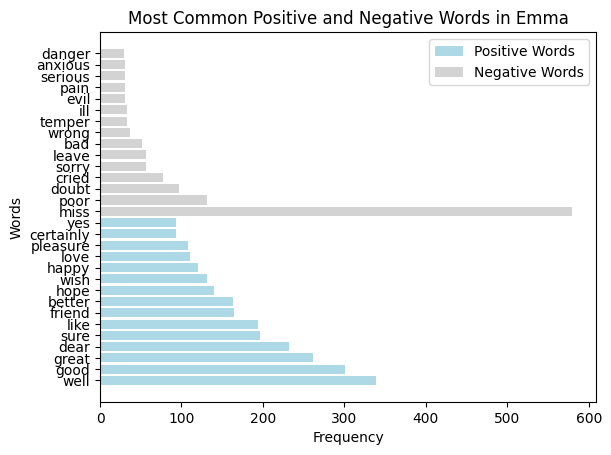

In [17]:
# Data visualization 1 --> Overall Sentiment

# Compute the overall polarity score of positive and negative words in each book
# Combine into one visualization

import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer
from string import punctuation

stop_words = set(stopwords.words('english'))
analyzer = vader.SentimentIntensityAnalyzer()

emma_string = jane_austen_work['Emma'].lower()
emma_tokens = word_tokenize(emma_string)

myStopWords = list(punctuation) + stopwords.words('english')
newEmma_list = [s for s in emma_tokens if s.lower() not in myStopWords]

# tokenize
pos_list1 = []
neg_list1 = []

for word in newEmma_list:
  score = analyzer.polarity_scores(word)
  compound_score = score['compound']
  if compound_score > 0:
    pos_list1.append(word)
  elif compound_score < 0:
    neg_list1.append(word)
  else:
    pass

# compose frequent words
com_pos1 = nltk.FreqDist(pos_list1).most_common(15)
com_neg1 = nltk.FreqDist(neg_list1).most_common(15)

# horizontal bar plot
pos_words1, pos_frequencies1 = zip(*com_pos1)
neg_words1, neg_frequencies1 = zip(*com_neg1)

plt.barh(pos_words1, pos_frequencies1, color='lightblue', label='Positive Words')
plt.barh(neg_words1, neg_frequencies1, color='lightgrey', label='Negative Words')

plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Positive and Negative Words in Emma')

plt.legend()
plt.show()

In [15]:
def pos_neg (book_title):
    book_string = jane_austen_work['book_title'].lower()
    book_tokens = book_tokenize(book_string)
    newBook_list = [s for s in emma_tokens if s.lower() not in myStopWords]
    
    pos_list1 = []
    neg_list1 = []

    for word in newEmma_list:
        score = analyzer.polarity_scores(word)
        compound_score = score['compound']
        if compound_score > 0:
            pos_list1.append(word)
        elif compound_score < 0:
            neg_list1.append(word)
        else:
            pass

    com_pos1 = nltk.FreqDist(pos_list1).most_common(15)
    com_neg1 = nltk.FreqDist(neg_list1).most_common(15)

    pos_words1, pos_frequencies1 = zip(*com_pos1)
    neg_words1, neg_frequencies1 = zip(*com_neg1)

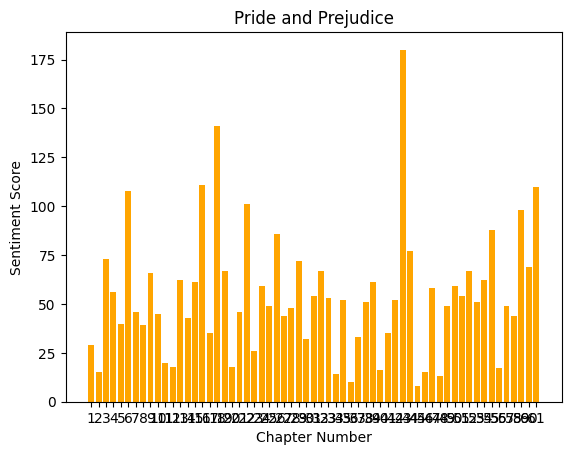

In [18]:
# Data visualization 2 --> Sentiment Development

# Compute development of sentiment in each book
# Combine into one visualization

chapter_sentiment = []
chapter_number = []

for number, scene in enumerate(chapters['Pride and Prejudice'], 1):
  chapter_words = word_tokenize(scene)
  chapter_sentiment_score = 0
  for word in chapter_words:
    scores = analyzer.polarity_scores(word)
    compound_score = scores['compound']
    if compound_score > 0:
        chapter_sentiment_score += 1
    elif compound_score < 0:
        chapter_sentiment_score -= 1
  chapter_sentiment.append(chapter_sentiment_score)
  chapter_number.append(number)

# Bar plot
colors = ['purple' if score < 0 
          else 'orange' 
          if score > 0 
          else 'gray' 
          for score in chapter_sentiment]

plt.bar(chapter_number, chapter_sentiment, color = colors)
plt.xlabel("Chapter Number")
plt.ylabel("Sentiment Score")
plt.title("Pride and Prejudice")
plt.xticks(chapter_number)
plt.show()

In [22]:
for work, chapters_list in chapters.items():
    chapter = word_tokenize(chapters_list)
    sentiment_scores = analyzer.polarity_scores(chapter)
    plt.plot(range(1, len(sentiment_scores) + 1), sentiment_scores, label=work)

plt.xlabel('Chapter Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Developments for Jane Austen Works')
plt.legend()
plt.tight_layout()
plt.show()

TypeError: expected string or bytes-like object

# Discussion

 Jane was born into a wealthy family and she was sponsored the entire life by her brother to work on literature. 